# Exploration of syncm features via synthesised sinusoids

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import*
import syncmetrics as syncm #from local folder
%matplotlib inline  

# version with no offset
def create_sin(A = 1, Fs = 8000, f = 5, b = 0):
    # A: amplitude, Fs: Frequency sampling, f: signal frequency, b: offset
    x = np.arange(Fs)
    y = A * np.sin(2 * np.pi * f * x / Fs + b)
    return x, y

# fixed Fs, duration version (sec)
def create_sin_dur(A = 1, dur = 15, f = 5, b = 0):
    # A: amplitude, dur: duration(s), f: signal frequency, b: offset
    Fs = 1000
    x = np.arange(Fs*dur)
    y = A * np.sin(2 * np.pi * f * x / Fs + b)
    return x, y

# fixed Fs, duration version (sec) with decreasing offset
def create_sin_dur_var(A = 1, dur = 15, f = 5, b = np.pi):
    # A: amplitude, dur: duration(s), f: signal frequency, b: offset
    Fs = 1000
    x = np.arange(Fs*dur)
    B = np.linspace(b, 0.0, num=Fs*dur)
    y = A * np.sin(2 * np.pi * f * x / Fs + B)
    return x, y

## Sinusoid with defined freq., sampling, amplitude and offset

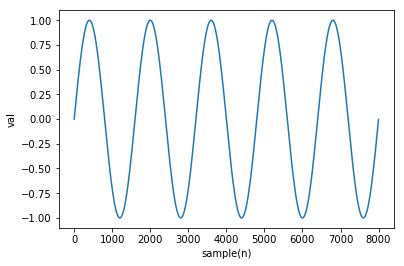

In [2]:
x, y = create_sin()
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('val')
plt.show()

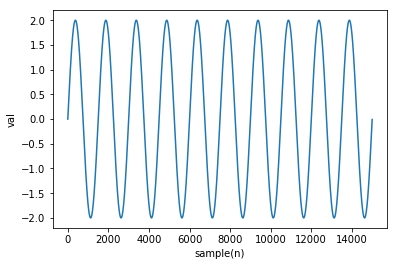

In [3]:
s, a = create_sin(2, 15000, 10, 0)
plt.plot(s, a)
plt.xlabel('sample(n)')
plt.ylabel('val')
plt.show()

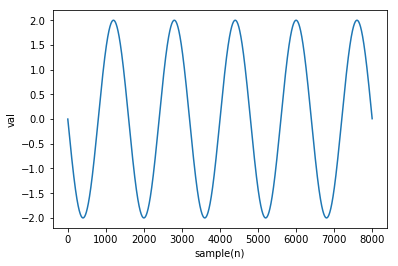

In [4]:
s, b = create_sin(2, 8000, 5, np.pi)
plt.plot(s, b)
plt.xlabel('sample(n)')
plt.ylabel('val')
plt.show()

## Sinusoid with fixed 1kHz Fs and input duration(s)

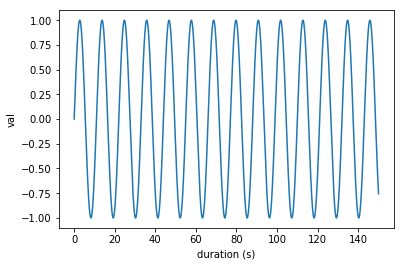

In [5]:
dur = 150
s, a = create_sin_dur(1, dur, 1/11, 0)
plt.plot(s/1000, a )
plt.xlabel('duration (s)')
plt.ylabel('val')
plt.show()

### Add noise and offset, compute cos similarity

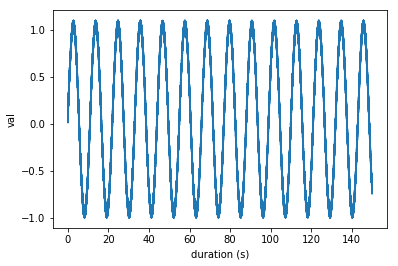

In [6]:
dur = 150
s, a = create_sin_dur(1, dur, 1/11, 0)
plt.plot(s/1000, a + 0.1*np.random.rand(len(s)))
plt.xlabel('duration (s)')
plt.ylabel('val')
plt.show()

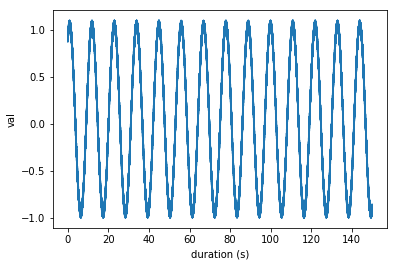

In [7]:
dur = 150
s, b = create_sin_dur(1, dur, 1/11, np.pi/3)
plt.plot(s/1000, b + 0.1*np.random.rand(len(s)))
plt.xlabel('duration (s)')
plt.ylabel('val')
plt.show()

In [8]:
syncm.cos_similarity(a,b)

array([[ 0.50217008]])

## Study (cos similarity): 2 Sinusoids with fixed 1kHz Fs and input duration(s). Decreasing phase shift

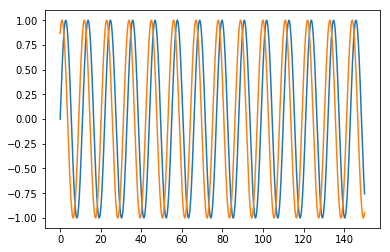

In [9]:
plt.plot(s/1000, a)
plt.plot(s/1000, b)
plt.show()

In [10]:
s, sigAx = create_sin_dur_var(1, dur, 1/11, np.pi/2)

In [11]:
s, sigBx = create_sin_dur(1, dur, 1/11, 0)

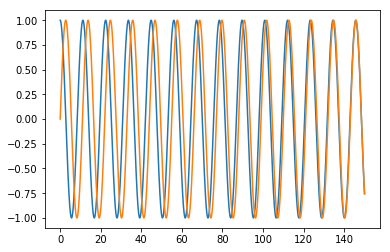

In [12]:
plt.plot(s/1000, sigAx)
plt.plot(s/1000, sigBx)
plt.show()

In [13]:
# Test a smaller slice before
sigA = sigAx[0:15000]
sigB = sigBx[0:15000]
syncm.compute_dim_slw(sigA, sigB, syncm.cos_similarity,12000, 0.9)

15000 3


In [14]:
# Compute and ensure no problems are present with the internal tolist() reshape scipy warning
C = syncm.cos_similarity(sigA,sigB)
m=[]
m,t = syncm.compute_metric_slw(sigA,sigB, syncm.cos_similarity, window=12000,overlap=.9)
print(C)
print(len(m))

15000
3
[[ 0.15459651]]
3


In [15]:
m=[]
m,t = syncm.compute_metric_slw(sigAx,sigBx, syncm.cos_similarity, window=12000,overlap=.9)
print(len(m))

150000
116
116


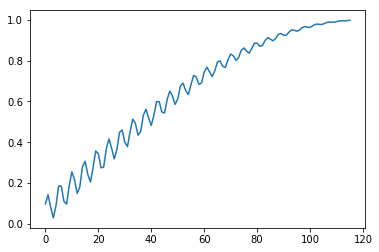

In [16]:
plt.plot(m)
plt.show()

150000
241
241


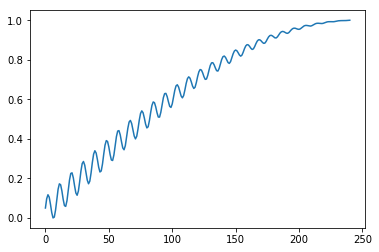

In [17]:
m=[]
m,t = syncm.compute_metric_slw(sigAx,sigBx, syncm.cos_similarity, window=6000,overlap=.9)
print(len(m))
plt.plot(m)
plt.show()

## Synth signals + get_phase difference test

In [18]:
# get_phase function created from a previous code
def get_phase(f,d):
    g = np.zeros(len(f))
    for i in range(len(f)):
        dn = int(d[i]<0)
        g[i] = (dn*np.pi - (2*dn-1)*asin(f[i]))
    return g%(2*np.pi)

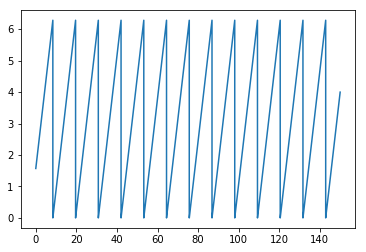

In [19]:
sx = s / 1000
dA = np.diff(sigAx)
phase_A = get_phase(sigAx[1:], dA)
plt.plot(sx[1:], phase_A)

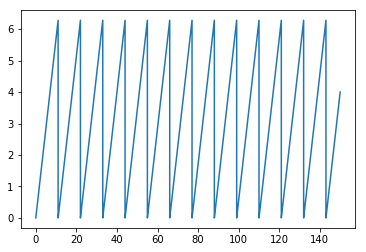

In [20]:
dB = np.diff(sigBx)
phase_B = get_phase(sigBx[1:], dB)
plt.plot(sx[1:], phase_B)

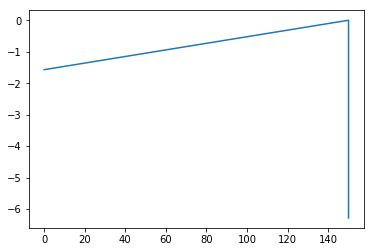

In [22]:
phase_diff = phase_B - phase_A
plt.plot(sx[1:],(phase_diff%(2*np.pi)-2*np.pi))